In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## check:
    ### CLE base in GAINS or MLE??
    ### More pulses in more places

In [3]:
# found here: https://gains.iiasa.ac.at/gains/reporting/select?versionID=ASN&rtype=datatable#
# based on the emissions factors from publication: 
#go to advanced model Asia, click all sources under emissions factors, select relevant details using ECLIPSE v6 and PM_BC, 
#other choice needed is the country and using CLE (current legislation, rather than MFR being maximum feasible reduction)


## CECILIA HAN SPRINGER, ERL PAPER

In [4]:
df = pd.read_csv('Springer_ERL/coal-plant-data.csv', encoding = 'ISO-8859-1')

In [5]:
df.columns

Index(['UNITID', 'UNIT', 'PLANT', 'COMPANY', 'MW', 'STATUS', 'YEAR', 'UTYPE',
       'FUEL', 'FUELTYPE', 'ALTFUEL', 'SSSMFR', 'BOILTYPE', 'TURBMFR',
       'TURBTYPE', 'GENMFR', 'GENTYPE', 'SFLOW', 'SPRESS', 'STYPE', 'STEMP',
       'REHEAT1', 'REHEAT2', 'PARTCTL', 'PART.BAT', 'PARTMFR', 'SO2CTL',
       'SO2.BAT', 'FGDMFR', 'NOXCTL', 'NOX.BAT', 'NOXMFR', 'AE', 'AE.COUNTRY',
       'AE.CHINA', 'CONSTRUCT', 'CON.COUNTRY', 'CON.CHINA', 'COOL', 'RETIRE',
       'CITY', 'STATE', 'COUNTRY', 'AREA', 'SUBREGION', 'POSTCODE', 'PARENT',
       'PAR.COUNTRY', 'PAR.CHINA', 'ELECTYPE', 'BUSTYPE', 'COMPID',
       'LOCATIONID', 'HEATRATE.UNADJ', 'EMISFACTOR.PLATTS', 'CAPFACTOR',
       'ANNUALCO2', 'EMISFACTOR.GCPT', 'HEATRATE.ADJ', 'COAL'],
      dtype='object')

In [6]:
### you need to do pulses for more places #######

In [7]:
#df_test_set = df.loc[(df['AE.CHINA'] == True) | (df['PAR.CHINA'] == True) | (df['CON.CHINA'] == True)]

In [12]:
df_test_set = df.loc[(df['COUNTRY'].isin(['INDONESIA','CAMBODIA', 'MALAYSIA', 'VIETNAM']))]

In [13]:
## question: what is def meaning as a status

In [14]:
np.unique(df_test_set['BUSTYPE'].dropna().values)

array(['COMM: AGRICULTURE', 'COMM: MISC AUTOPROD',
       'COMM: SUGAR MILL/PLANT', 'COMM: TRADE/CONGLOMERATE',
       'FUELS: COAL', 'MFG: CEMENT', 'MFG: CHEMICALS', 'MFG: EQUIPMENT',
       'MFG: METALS & MINING', 'MFG: PULP & PAPER',
       'MFG: TEXTILES & CLOTHING', 'SVCS: ARCH/ENG/CONSTR',
       'SVCS: PRIV PWR DEV/PROD', 'UTIL: GOVT', 'UTIL: IOU'], dtype=object)

acronyms: cancelled:'CAN'
construction: 'CON'
'DEF': shelved
delayed: 'DEL'
operating: 'OPR'
planned:'PLN'
retired:'RET'
'STN': none in our grouping
unknown:'UNK'

include: 'CON', 'OPR'

In [15]:
df_test_set = df_test_set.loc[df_test_set['STATUS'].isin(['CON','OPR'])]

## GAINS

In [16]:
df_dict = {}

In [17]:
for idx in [f' ({i})' for i in np.arange(1,11)]:
    df_gains = pd.read_excel(f'GAINS_emis_factors/emiss_factors{idx}.xlsx', header = [0,7])
    df_gains = df_gains.drop(0)
    df_gains.columns = df_gains.columns.droplevel(0)
    df_gains = df_gains.drop(columns = ['Emission factor [kt/act.unit].1','Emission factor [kt/act.unit]', 'kt PM PM_BC/Act.unit','Technology.1'])
    df_gains = df_gains.rename(columns = {'Technology':'Emission factor [kt/act.unit]', 
                 'Sector.1': 'kt PM PM_BC/Act.unit',
                 'Sector': 'Technology',
                 'Fuel Activity.1':'Sector'})
    df_dict[df_gains.iloc[-1]['Fuel Activity']] = df_gains

In [18]:
df_gains['Emission factor [kt/act.unit]']

1                   0.00076
2                   0.00076
3                   0.00006
4                   0.00015
5                   0.00015
               ...         
1369                    NaN
1370                    NaN
1371                 Energy
1372                    ENE
1373    WEO2018_NPS_UPD_V2b
Name: Emission factor [kt/act.unit], Length: 1373, dtype: object

In [19]:
np.unique(df_gains['kt PM PM_BC/Act.unit'].values.astype('str'))

array(['AGR', 'Agriculture', 'CURRENT_PATTERN_2019_AGR', '[Gvkm]',
       '[M animals]', '[M ha]', '[M m2]', '[M people]', '[Mt Cl2/year]',
       '[Mt waste]', '[Mt]', '[PJ]', '[kt PM (TSP)]', '[kt]',
       '[t Au/year]', '[t Hg/year]', 'nan'], dtype='<U24')

In [20]:
# PP_ENG	Generator sets	---	---	gains_sector_3
# PP_EX_L	Power & district heat plants - existing coal (>50 MWth)	ENE	PJ	sector
# PP_EX_OTH	Power & district heat plants - existing (excl. coal)	ENE	PJ	sector
# PP_EX_S	Power & district heat plants - existing coal (<50 MWth)	ENE	PJ	sector
# PP_ICD_CCS	IGCC new - CHP district heat - CCS	---	---	other
# PP_ICD_NCS	IGCC new - CHP district heat - no CCS	---	---	other
# PP_ICI_CCS	IGCC new - CHP industry - CCS	---	---	other
# PP_ICI_NCS	IGCC new - CHP industry - no CCS	---	---	other
# PP_IE_CCS	IGCC new - elec. only - CCS	---	---	other
# PP_IE_NCS	IGCC new - elec. only - no CCS	---	---	other
# PP_IGCC	Power & district heat plants - IGCC	ENE	PJ	sector
# PP_IGCC_CCS	IGGC new plant with CCS	---	---	other
# PP_IGCC_CCS	Power & district heat plants - IGCC with CCS	ENE	PJ	sector
# PP_IGCC_CHP_DH	IGGC new CHP for district heat	---	---	other
# PP_IGCC_CHP_IN	IGGC new CHP in Industry	---	---	other
# PP_IGCC_EL	IGGC new - elec. only	---	---	other
# PP_IGCC_NOCCS	IGGC new plant without CCS	---	---	other
# PP_MOD	Modern power plants (coal: ultra & supercritical; gas: CCGT) -->

# BC1 Brown coal/lignite, grade 1
# BC2 Brown coal/lignite, grade 2 (includes peat)
# DC Derived coal (coke, briquettes)
# ELE Electricity
# GAS Natural gas (incl. CNG and derived gases)
# GSL Gasoline and other light fractions of oil; includes biofuels
# H2 Hydrogen
# HC1 Hard coal, grade 1
# HC2 Hard coal, grade 2
# HC3 Hard coal, grade 3

ANTH : HC1

ANTH/CULM : HC1

BIT : HC2

BIT/SUB : HC2

SUB : HC3

LIG : BC1

BH : FF
    
ESP : ESP1

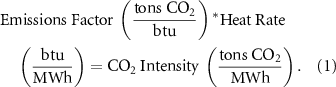

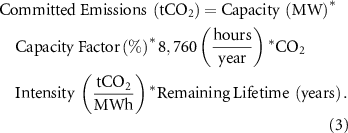


Annual CO2 is in gigatons, emisfactor is in tons

df_test_set## Fill in co2 emissions factors and heat rates that are missing

In [21]:
df_test_set.columns

Index(['UNITID', 'UNIT', 'PLANT', 'COMPANY', 'MW', 'STATUS', 'YEAR', 'UTYPE',
       'FUEL', 'FUELTYPE', 'ALTFUEL', 'SSSMFR', 'BOILTYPE', 'TURBMFR',
       'TURBTYPE', 'GENMFR', 'GENTYPE', 'SFLOW', 'SPRESS', 'STYPE', 'STEMP',
       'REHEAT1', 'REHEAT2', 'PARTCTL', 'PART.BAT', 'PARTMFR', 'SO2CTL',
       'SO2.BAT', 'FGDMFR', 'NOXCTL', 'NOX.BAT', 'NOXMFR', 'AE', 'AE.COUNTRY',
       'AE.CHINA', 'CONSTRUCT', 'CON.COUNTRY', 'CON.CHINA', 'COOL', 'RETIRE',
       'CITY', 'STATE', 'COUNTRY', 'AREA', 'SUBREGION', 'POSTCODE', 'PARENT',
       'PAR.COUNTRY', 'PAR.CHINA', 'ELECTYPE', 'BUSTYPE', 'COMPID',
       'LOCATIONID', 'HEATRATE.UNADJ', 'EMISFACTOR.PLATTS', 'CAPFACTOR',
       'ANNUALCO2', 'EMISFACTOR.GCPT', 'HEATRATE.ADJ', 'COAL'],
      dtype='object')

In [22]:
#convert to numbers
df_test_set['EMISFACTOR.GCPT'] = df_test_set['EMISFACTOR.GCPT'].str.replace(",", "").astype('float32')
#make a co2 emisfactor column (fix the name)
df_test_set['EMISFACTOR.CO2'] = df_test_set['EMISFACTOR.PLATTS']
#if no platts value, input gcpt
df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna(), 'EMISFACTOR.CO2'] = df_test_set['EMISFACTOR.GCPT']

In [23]:
## missing emissions factors are assigned by matching size and country to plants (30 missing)

v = 'MW'
w = 'COUNTRY'
for idx in df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna()].index:
    #print(idx)
    df_test_set.loc[idx, 'EMISFACTOR.CO2'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna(),v][idx]) & 
                    (df_test_set[w] == df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna(),w][idx]), 'EMISFACTOR.PLATTS'].mean()


In [24]:
#second round missing emissions factors are assigned by finding the closest MW plant in the same country
for idx in df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna()].index:
    mw_val = df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna()].loc[idx,'MW']
    mw_df = df_test_set.loc[~df_test_set['EMISFACTOR.CO2'].isna()]
    mw_idx = mw_df.loc[(mw_df[w] == df_test_set.loc[df_test_set['EMISFACTOR.CO2'].isna(),w][idx])]['MW'].sub(mw_val).abs().idxmin()
    #print(mw_idx)
    df_test_set.loc[idx, 'EMISFACTOR.CO2'] = df_test_set.loc[mw_idx, 'EMISFACTOR.CO2']

In [25]:
df_test_set['HEATRATE'] = df_test_set['HEATRATE.ADJ']

In [26]:
## missing heat rate are assigned by matching size and country to plants and taking the mean

for idx in df_test_set.loc[df_test_set['HEATRATE'].isna()].index:
    df_test_set.loc[idx, 'HEATRATE'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['HEATRATE'].isna(),v][idx]) & 
                        (df_test_set[w] == df_test_set.loc[df_test_set['HEATRATE'].isna(),w][idx]), 'HEATRATE.ADJ'].mean()


In [27]:
#second round missing heat rate are assigned by finding the closest MW plant in the same country
for idx in df_test_set.loc[df_test_set['HEATRATE'].isna()].index:
    mw_val = df_test_set.loc[df_test_set['HEATRATE'].isna()].loc[idx,'MW']
    mw_df = df_test_set.loc[~df_test_set['HEATRATE'].isna()]
    mw_idx = mw_df.loc[(mw_df[w] == df_test_set.loc[df_test_set['HEATRATE'].isna(),w][idx])]['MW'].sub(mw_val).abs().idxmin()
    #print(mw_idx)
    df_test_set.loc[idx, 'HEATRATE'] = df_test_set.loc[mw_idx, 'HEATRATE']

## Calculate annual co2 emissions that are missing

In [28]:
df_test_set.loc[df_test_set['ANNUALCO2'].isna(), 'ANNUALCO2'] = ((df_test_set.loc[df_test_set['ANNUALCO2'].isna(), 'MW'] *
                                                                  df_test_set.loc[df_test_set['ANNUALCO2'].isna(), 'CAPFACTOR'] *
                                                                  df_test_set.loc[df_test_set['ANNUALCO2'].isna(), 'EMISFACTOR.CO2'] * 
                                                                  8760 * 
                                                                  df_test_set.loc[df_test_set['ANNUALCO2'].isna(), 'HEATRATE']
                                                                 )/
                                                                 1e9)

In [29]:
#should be empty
df_test_set.loc[df_test_set['ANNUALCO2'].isna()]

,UNITID,UNIT,PLANT,COMPANY,MW,STATUS,YEAR,UTYPE,FUEL,FUELTYPE,...,LOCATIONID,HEATRATE.UNADJ,EMISFACTOR.PLATTS,CAPFACTOR,ANNUALCO2,EMISFACTOR.GCPT,HEATRATE.ADJ,COAL,EMISFACTOR.CO2,HEATRATE


## Create BC emissions factor from GAINS data

PP_MOD --> Modern power plants (coal: ultra & supercritical; gas: CCGT)

PP_EX_L --> Power & district heat plants - existing coal (>50 MWth)

PP_EX_OTH --> Power & district heat plants - existing (excl. coal)

PP_EX_S --> Power & district heat plants - existing coal (<50 MWth)


In [30]:
df_test_set.loc[:,('EMISFACTOR.BC.GAINS')] = np.nan

In [31]:
##rename the stype for convenience of assigning bc emissions

df_test_set.loc[(df_test_set['STYPE'] == 'SUBCR') & (df_test_set['MW'] < 50), 'STYPE'] = 'SUBCR_less50'
df_test_set.loc[(df_test_set['STYPE'] == 'SUBCR') & (df_test_set['MW'] > 50), 'STYPE'] = 'SUBCR_great50'

df_test_set.loc[(df_test_set['STYPE'] == 'SUPERC'), 'STYPE'] = 'SUPRSC/ULTRSC'
df_test_set.loc[(df_test_set['STYPE'] == 'ULTRSC'), 'STYPE'] = 'SUPRSC/ULTRSC'

In [32]:
country_list = {}

country = 'INDONESIA'
country_list[country] = ['INDONESIA_Sumatra', 'INDONESIA_Rest of country','INDONESIA_Java','INDONESIA_Jakarta']
country = 'MALAYSIA'
country_list[country] = ['MALAYSIA_Sarawak-Sabah', 'MALAYSIA_Peninsular Malaysia','MALAYSIA_Kuala Lumpur']
country = 'VIETNAM'
country_list[country] = ['VIETNAM_South: Mekong River Delta-Ho Chi Minh City', 'VIETNAM_North: Red River Delta-Hanoi']
country = 'CAMBODIA'
country_list[country] = ['CAMBODIA']


#match fuel type, controls, and tech type between the two datasets (GAINS and the Han-Springer data)
fueltypes = {'ANTH':'HC1','ANTH/CULM':'HC1', 'BIT':'HC2', 'BIT/SUB':'HC2', 'SUB':'HC3', 'LIG':'BC1'}
controls = {'BH':'FF','ESP':'ESP1'}
powers = {'PP_MOD':'SUPRSC/ULTRSC', 'PP_EX_L':'SUBCR_great50', 'PP_EX_S':'SUBCR_less50'}


for country in country_list.keys():
    for fuel_tp in fueltypes.keys():
        for ctrl in controls.keys():
            for pwr in powers.keys():
                out = 0
                for r in country_list[country]:
                    print(out, pwr, fuel_tp, r)
                    out += df_dict[r].loc[(df_dict[r]['Sector'] == pwr) & 
                           (df_dict[r]['Fuel Activity'] == fueltypes[fuel_tp])& 
                           (df_dict[r]['Technology'] == controls[ctrl]), 'Emission factor [kt/act.unit]']
                if not out.empty:
                    #print(float(out.values/len(country_list[country])))
                    df_test_set.loc[(df_test_set['STYPE'] == powers[pwr]) &
                                    (df_test_set['FUELTYPE'] == fuel_tp) & 
                                    (df_test_set['PARTCTL'] == ctrl) & 
                                    (df_test_set['COUNTRY'] == country), 'EMISFACTOR.BC.GAINS'] = float(out.values/len(country_list[country]))
                    #print(float(out.values), r)
                    #print(float(out.values/len(country_list[country])), r)


0 PP_MOD ANTH INDONESIA_Sumatra
581    0.0
Name: Emission factor [kt/act.unit], dtype: object PP_MOD ANTH INDONESIA_Rest of country
581    0.0
Name: Emission factor [kt/act.unit], dtype: object PP_MOD ANTH INDONESIA_Java
581    0.0
Name: Emission factor [kt/act.unit], dtype: object PP_MOD ANTH INDONESIA_Jakarta
0 PP_EX_L ANTH INDONESIA_Sumatra
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_L ANTH INDONESIA_Rest of country
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_L ANTH INDONESIA_Java
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_L ANTH INDONESIA_Jakarta
0 PP_EX_S ANTH INDONESIA_Sumatra
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_S ANTH INDONESIA_Rest of country
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_S ANTH INDONESIA_Java
Series([], Name: Emission factor [kt/act.unit], dtype: object) PP_EX_S ANTH INDONESIA_Jakarta
0 PP_MOD ANTH INDONESIA_Sumatra
579    0.0002
N

In [33]:
## fill in the blanks on BC emissions factors based on similar SO2 emissions factors, then by NOx emissions factors, then by size, then by country

In [34]:
len(df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()])

286

In [35]:
v = 'SO2CTL'
for idx in df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()].index:
    df_test_set.loc[idx, 'EMISFACTOR.BC.GAINS'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna(),v][idx]), 'EMISFACTOR.BC.GAINS'].mean()

In [36]:
len(df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()])

185

In [37]:
v = 'NOXCTL'
for idx in df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()].index:
    df_test_set.loc[idx, 'EMISFACTOR.BC.GAINS'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna(),v][idx]), 'EMISFACTOR.BC.GAINS'].mean()

In [38]:
len(df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()])

182

In [39]:
v = 'MW'
for idx in df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()].index:
    df_test_set.loc[idx, 'EMISFACTOR.BC.GAINS'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna(),v][idx]), 'EMISFACTOR.BC.GAINS'].mean()

In [40]:
len(df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()])

53

In [41]:
v = 'COUNTRY'
for idx in df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()].index:
    df_test_set.loc[idx, 'EMISFACTOR.BC.GAINS'] = df_test_set.loc[(df_test_set[v] == df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna(),v][idx]), 'EMISFACTOR.BC.GAINS'].mean()

In [42]:
len(df_test_set.loc[df_test_set['EMISFACTOR.BC.GAINS'].isna()])

0

In [43]:
PJ_per_J = 1e-15
joules_per_wh = 3600 #convert from joules = w/sec --> wh
wh_per_mwh = 1e6 #convert from wh to mwh
PJ_per_MWh = PJ_per_J*joules_per_wh*wh_per_mwh
## 1 kt = 1000000000 g
g_per_kt = 1e9
hrs_in_day= 24 
delta_t_emit = 1 #day that it is emitted over

In [44]:
df_test_set.loc[:,'EMISFACTOR.BC.GAINS.g_mwh'] = df_test_set.loc[:,'EMISFACTOR.BC.GAINS']* PJ_per_MWh #kt/MWh
df_test_set.loc[:,'EMISFACTOR.BC.GAINS.g_mwh'] = df_test_set.loc[:,'EMISFACTOR.BC.GAINS.g_mwh']* g_per_kt #g/MWh 


In [45]:
df_test_set.loc[:,'MWh_daily'] = df_test_set['MW']*hrs_in_day

In [46]:
df_test_set.loc[:,'BC (g/day)'] = df_test_set['MWh_daily']*df_test_set['EMISFACTOR.BC.GAINS.g_mwh']/delta_t_emit #day that it is emitted over

In [60]:
df_test_set = df_test_set.drop_duplicates(subset = ['UNIT'])

In [61]:
df_test_set['unique_ID'] =  pd.factorize(df_test_set['UNIT'])[0] + 1

/tmp/ipykernel_986/3104021625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_set['unique_ID'] =  pd.factorize(df_test_set['UNIT'])[0] + 1


In [62]:
df_test_set['unique_ID']

25        1
26        2
27        3
28        4
29        5
       ... 
9490    376
9491    377
9492    378
9493    379
9494    380
Name: unique_ID, Length: 380, dtype: int64

In [63]:
df_test_set.to_csv('mod_coal_inputs/BC_SE_Asia_all_financing_SEA_GAINS_Springer.csv')